In [1]:
import numpy as np
import pandas as pd

In [10]:
df = pd.read_excel('dados/Enhanced_pizza_sell_data_2024-25.xlsx')

In [12]:
with pd.option_context('display.max_columns', None):
    display(df.head())

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),Traffic Level,Payment Method,Is Peak Hour,Is Weekend,Delivery Efficiency (min/km),Topping Density,Order Month,Payment Category,Estimated Duration (min),Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time
0,ORD001,Domino's,"New York, NY",2024-01-05 18:30:00,2024-01-05 18:45:00,15,Medium,Veg,3,2.5,Medium,Card,True,False,6.000000,1.200000,January,Online,6.0,9.0,False,6,2,18,30.259434
1,ORD002,Papa John's,"Los Angeles, CA",2024-02-14 20:00:00,2024-02-14 20:25:00,25,Large,Non-Veg,4,5.0,High,Wallet,True,False,5.000000,0.800000,February,Online,12.0,13.0,False,12,3,20,28.186275
2,ORD003,Little Caesars,"Chicago, IL",2024-03-21 12:15:00,2024-03-21 12:35:00,20,Small,Vegan,2,3.0,Low,UPI,False,False,6.666667,0.666667,March,Online,7.2,12.8,False,2,1,12,28.844221
3,ORD004,Pizza Hut,"Miami, FL",2024-04-10 19:45:00,2024-04-10 20:10:00,25,XL,Cheese Burst,5,4.5,Medium,Cash,True,False,5.555556,1.111111,April,Offline,10.8,14.2,False,20,2,19,29.948454
4,ORD005,Marco's Pizza,"Dallas, TX",2024-05-05 13:00:00,2024-05-05 13:20:00,20,Medium,Non-Veg,3,2.0,High,Card,False,True,10.000000,1.500000,May,Online,4.8,15.2,False,6,3,13,30.286458


In [20]:
print(f"Data mínima: {pd.to_datetime(df['Order Time'].min()).date()}")
print(f"Data máxima: {pd.to_datetime(df['Order Time'].max()).date()}")

Data mínima: 2024-01-05
Data máxima: 2026-07-07


In [22]:
df[['Payment Method']].value_counts().reset_index(name = 'count')

,Payment Method,count
0,Card,276
1,UPI,271
2,Wallet,208
3,Cash,202
4,Hut Points,24
5,Domino's Cash,23


In [23]:
from modulos.chi_quadrado_cramers_v import *

In [24]:
df.columns

Index(['Order ID', 'Restaurant Name', 'Location', 'Order Time',
       'Delivery Time', 'Delivery Duration (min)', 'Pizza Size', 'Pizza Type',
       'Toppings Count', 'Distance (km)', 'Traffic Level', 'Payment Method',
       'Is Peak Hour', 'Is Weekend', 'Delivery Efficiency (min/km)',
       'Topping Density', 'Order Month', 'Payment Category',
       'Estimated Duration (min)', 'Delay (min)', 'Is Delayed',
       'Pizza Complexity', 'Traffic Impact', 'Order Hour',
       'Restaurant Avg Time'],
      dtype='object')

Qui-quadrado: 455.7755
P-valor: 0.0000
Cramér's V: 0.1348

***Interpretação da medida de associação Cramér's V:***
0.00 a 0.10 | Muito fraca ou nenhuma associação
0.10 a 0.20 | Fraca
0.20 a 0.40 | Moderada
0.40 a 0.60 | Forte
0.60 a 1.00 | Muito forte



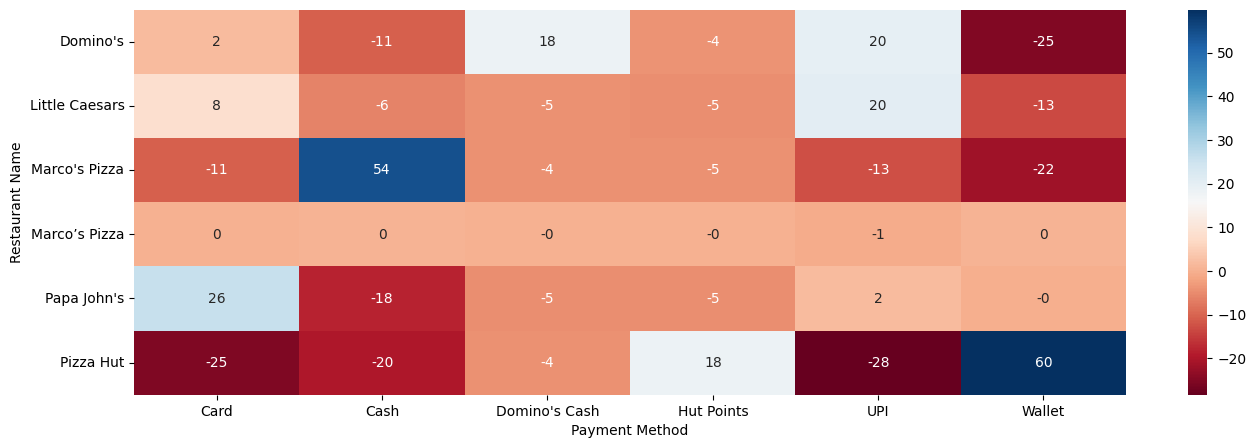

In [25]:
chi2, p, v = cramers_v(df = df, var1 = 'Restaurant Name', var2 = 'Payment Method', relatorio = True)